In [22]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## MNIST data setup

In [23]:
from fastai.basics import *

In [24]:
from pathlib import Path
import requests

In [25]:
DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

In [26]:
if not (PATH / FILENAME).exists():
    content = requests.get(URL + FILENAME).content
    (PATH / FILENAME).open("wb").write(content)

In [27]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


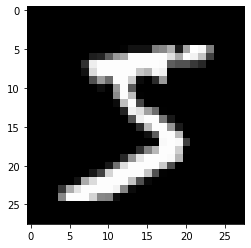

In [28]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [29]:
import torch

x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor(0),
 tensor(9))

## Neural net from scratch (no torch.nn)

In [30]:
import math

weights = torch.randn(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [31]:
def log_softmax(x): # 
    return x - x.exp().sum(-1).log().unsqueeze(-1)

In [32]:
def model(xb): # y = A*x + B
    return log_softmax(xb @ weights + bias) # @ = matmul

In [33]:
xb = x_train[0:4]
yb_hat = xb @ weights + bias
print(xb)
print(" - ", yb_hat.shape)
print(yb_hat)
print(yb_hat.exp())
print(" - ", yb_hat.exp().sum(-1).shape)
print(yb_hat.exp().sum(-1))
print(yb_hat.exp().sum(-1).log())

print(" - ", yb_hat.exp().sum(-1).log().unsqueeze(-1).shape)
print(yb_hat.exp().sum(-1).log().unsqueeze(-1))
# print(yb_hat - yb_hat.exp().sum(-1).log().unsqueeze(-1))

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
 -  torch.Size([4, 10])
tensor([[-0.2814, -0.5893,  0.2330, -0.3405,  0.3237, -0.1909,  0.2615,  0.1826,
         -0.1422, -0.1631],
        [-0.2186, -0.3369,  0.6891, -0.5309,  0.6849, -0.1745, -0.1686, -0.0143,
         -0.1234, -0.1753],
        [ 0.3787, -0.1567,  0.0543,  0.0239,  0.2993,  0.1975,  0.3936,  0.5096,
         -0.3119,  0.0871],
        [-0.2058, -0.1878, -0.0629,  0.0478,  0.2016, -0.6491,  0.1451, -0.3688,
         -0.1421, -0.1653]], grad_fn=<AddBackward0>)
tensor([[0.7547, 0.5547, 1.2623, 0.7114, 1.3822, 0.8262, 1.2989, 1.2003, 0.8675,
         0.8495],
        [0.8036, 0.7139, 1.9919, 0.5881, 1.9836, 0.8399, 0.8448, 0.9858, 0.8839,
         0.8392],
        [1.4603, 0.8549, 1.0558, 1.0241, 1.3489, 1.2184, 1.4823, 1.6647, 0.7320,
         1.0911],
        [0.8140, 0.8288, 0.9390, 1.0490, 1.2233, 0.5225, 

In [34]:
bs = 64

xb = x_train[0:bs]
preds = model(xb)
preds[0], preds.shape

(tensor([-2.5543, -2.8622, -2.0400, -2.6134, -1.9492, -2.4638, -2.0114, -2.0903,
         -2.4151, -2.4360], grad_fn=<SelectBackward>),
 torch.Size([64, 10]))

In [35]:
def nll(input, target):
    return -input[range(target.shape[0]), target].mean()

loss_func = nll

![](https://discuss.pytorch.org/uploads/default/original/2X/e/e91db7a4cfd1bce5351a66dbaa7950a4ccc543ac.png)

In [36]:
yb = y_train[0:4]
print(yb_hat)
print(yb)
print(nll(yb_hat, yb))

tensor([[-0.2814, -0.5893,  0.2330, -0.3405,  0.3237, -0.1909,  0.2615,  0.1826,
         -0.1422, -0.1631],
        [-0.2186, -0.3369,  0.6891, -0.5309,  0.6849, -0.1745, -0.1686, -0.0143,
         -0.1234, -0.1753],
        [ 0.3787, -0.1567,  0.0543,  0.0239,  0.2993,  0.1975,  0.3936,  0.5096,
         -0.3119,  0.0871],
        [-0.2058, -0.1878, -0.0629,  0.0478,  0.2016, -0.6491,  0.1451, -0.3688,
         -0.1421, -0.1653]], grad_fn=<AddBackward0>)
tensor([5, 0, 4, 1])
tensor(0.0745, grad_fn=<NegBackward>)


In [37]:
yb = y_train[0:bs]
print(loss_func(preds, yb))

tensor(2.3465, grad_fn=<NegBackward>)


In [38]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds==yb).float().mean()

accuracy(preds, yb)

tensor(0.0312)

In [39]:
from IPython.core.debugger import set_trace

lr = 0.5
epochs = 2

for epoch in range(epochs):
    for i in range((n-1) // bs + 1):
        # set_trace()
        start_i = i * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb)
        
        if (i % 100 == 0):
            print(loss_func(model(xb), yb), accuracy(model(xb), yb))
        
        loss.backward()
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()

tensor(2.3465, grad_fn=<NegBackward>) tensor(0.0312)
tensor(0.3206, grad_fn=<NegBackward>) tensor(0.8906)
tensor(0.2962, grad_fn=<NegBackward>) tensor(0.8906)
tensor(0.3878, grad_fn=<NegBackward>) tensor(0.9219)
tensor(0.2318, grad_fn=<NegBackward>) tensor(0.9062)
tensor(0.3829, grad_fn=<NegBackward>) tensor(0.8906)
tensor(0.2598, grad_fn=<NegBackward>) tensor(0.8906)
tensor(0.3789, grad_fn=<NegBackward>) tensor(0.9062)
tensor(0.2786, grad_fn=<NegBackward>) tensor(0.9219)
tensor(0.2615, grad_fn=<NegBackward>) tensor(0.9219)
tensor(0.1931, grad_fn=<NegBackward>) tensor(0.9062)
tensor(0.3439, grad_fn=<NegBackward>) tensor(0.9219)
tensor(0.2081, grad_fn=<NegBackward>) tensor(0.9219)
tensor(0.3562, grad_fn=<NegBackward>) tensor(0.8906)
tensor(0.2243, grad_fn=<NegBackward>) tensor(0.9219)
tensor(0.3632, grad_fn=<NegBackward>) tensor(0.8906)


## Using torch.nn.functional

In [40]:
import torch.nn.functional as F
loss_func = F.cross_entropy

def model(xb):
    return xb @ weights + bias

print(loss_func(model(xb), yb), accuracy(model(xb), yb))

tensor(0.0820, grad_fn=<NllLossBackward>) tensor(1.)


## Refactor using nn.Module

In [55]:
# Define model + weights + bias
from torch import nn

class MNIST_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(784, 10) / math.sqrt(784)) # why this?
        self.bias = nn.Parameter(torch.zeros(10))
        
    def forward(self, xb):
        return xb @ self.weights + self.bias
        
model1 = MNIST_Logistic()

In [54]:
# print(xb)
# print(loss_func(model(xb), yb))
model1.forward(xb)

tensor([[-0.0603, -0.0999, -0.2202, -0.0444,  0.3590, -0.2652, -0.3606,  0.2509,
          0.2007,  0.1198],
        [-0.4424,  0.0381,  0.4372, -0.6035, -0.1194, -0.0392, -0.1220, -0.2474,
          0.6651,  0.8032],
        [-0.2665,  0.1499, -0.1397, -0.2633,  0.2971, -0.4682, -0.2537,  0.2613,
          0.0707,  0.0073],
        [-0.1694, -0.0251, -0.2609, -0.3975,  0.5751, -0.1269,  0.1603,  0.5864,
          0.5134,  0.4698],
        [-0.4283, -0.1547, -0.0429, -0.4453,  0.7653, -0.0700,  0.0126,  0.4515,
          0.1131,  0.2622],
        [-0.4621,  0.1753, -0.0023, -0.3432,  0.4091,  0.1297,  0.2102,  0.0234,
         -0.0912,  1.2859],
        [-0.1730, -0.2817, -0.0484,  0.0912,  0.1999, -0.2484,  0.0902,  0.0379,
          0.7126,  0.3181],
        [-0.2851,  0.0673,  0.3023, -0.1750,  0.1156,  0.1254,  0.0800, -0.1874,
          0.7072,  0.8287],
        [-0.1097,  0.0630, -0.5649, -0.0092,  0.9743,  0.0824, -0.1162,  0.1731,
          0.0797,  1.0383],
        [-0.2876,  

## Refactor using nn.Linear

## Refactor using optim

## Refactor using Dataset

## Refactor using DataLoader

## Add validation

## Create fit() and get_data()

## Switch to CNN

## nn.Sequential

## Wrapping DataLoader

## Using your GPU

## Closing thoughts